In [59]:
!cd c:\projects

In [60]:
%cd

C:\Users\광주인공지능사관학교


In [96]:
# rhinoMorph.onlyMorph_list(rn, "좋아졌어", eomi=True)

In [107]:
import pandas as pd
pd.set_option('display.max_rows', 20)
label = pd.read_csv("c:/pytest/감성사전_조별과제/label_final.csv")
positive = pd.read_csv("c:/pytest/감성사전_조별과제/pos_final.csv")
negative = pd.read_csv("c:/pytest/감성사전_조별과제/neg_final.csv")
# data = pd.read_csv("./pytest/감성대화말뭉치/감성대화말뭉치(최종데이터)_Validation.csv")
yours = pd.read_csv("c:/pytest/감성사전_조별과제/6조_감성대화말뭉치.csv", encoding='cp949')
positive['sign']=1
# negative['sign']=0
# # positive.rename(columns={'단어':'a'}, inplace=True)
# # negative.rename(columns={'단어':'a'}, inplace=True)
# con = pd.concat([positive, negative], axis=0)
# con['중복'] = con['단어'].duplicated(keep=False)
# con = con.sort_values(by='단어')
# con[con['중복']==True]
# data[3000:3601]['사람문장1']

In [108]:
# positive.to_csv("c:/pytest/감성사전_조별과제/pos.csv", encoding='cp949')
# negative.to_csv("c:/pytest/감성사전_조별과제/neg.csv", encoding='cp949')
# %cd

In [109]:
pos = list(positive.단어)
neg = list(negative.단어)
remove_pos_list = ['친구','기분','가족','여행','합격']
remove_neg_list = []
for i in remove_pos_list:
    pos.remove(i)
for i in remove_neg_list:
    neg.remove(i)

In [110]:
yours.rename(columns={'사람문장1':'text', '긍정/중립/부정':'original'}, inplace=True)
yours['pos']=None
yours['pos_word']=None
yours['neg']=None
yours['neg_word']=None
yours['senti_score']=None
yours['sigmoid']=None
yours['predict']=None
yours['일치여부']=None

In [111]:
import rhinoMorph
rn = rhinoMorph.startRhino()

def keyword_pos(text):
    result = 0
    morphed_data_each, _ = rhinoMorph.wholeResult_list(rn, text, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True, combineN=True)
    for word in morphed_data_each:
        if word in pos:
            result += 1
    return result

def keyword_pos_word(text):
    result = []
    morphed_data_each, _ = rhinoMorph.wholeResult_list(rn, text, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True, combineN=True)
    for word in morphed_data_each:
        if word in pos:
            result.append(word)
    return result

def keyword_neg(text):
    result = 0
    morphed_data_each, _ = rhinoMorph.wholeResult_list(rn, text, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True, combineN=True)
    for word in morphed_data_each:
        if word in neg:
            result += 1
    return result

def keyword_neg_word(text):
    result = []
    morphed_data_each, _ = rhinoMorph.wholeResult_list(rn, text, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True, xrVv=True, combineN=True)
    for word in morphed_data_each:
        if word in neg:
            result.append(word)
    return result

import math
def sigmoid(num):
    return 1/(1+math.exp(-num))

def predict(num):
    result = '긍정'
    if num<=0.5:
        result = '부정'
    # elif num==0.5:
    #     result = '중립'
    return result

filepath:  c:\projects\venv\lib\site-packages
classpath:  c:\projects\venv\lib\site-packages\rhinoMorph/lib/rhino.jar
JVM is already started~
RHINO started!


In [112]:
yours.pos = yours.text.apply(keyword_pos)
yours.pos_word = yours.text.apply(keyword_pos_word)
yours.neg = yours.text.apply(keyword_neg)
yours.neg_word = yours.text.apply(keyword_neg_word)
yours.senti_score = yours.pos-yours.neg
yours.sigmoid = yours.senti_score.apply(sigmoid)
yours.predict = yours.sigmoid.apply(predict)
yours.loc[yours.original==yours.predict, '일치여부'] = 'O'
yours.loc[yours.original!=yours.predict, '일치여부'] = 'X'

In [113]:
yours[:10]

,text,original,pos,pos_word,neg,neg_word,senti_score,sigmoid,predict,일치여부
0,직장에서 해고당할 것 같아서 불안해.,부정,0,[],2,"[해고, 불안하다]",-2,0.119203,부정,O
1,당뇨 때문에 강제로 운동을 해야 해서 너무 짜증 나.,부정,0,[],2,"[당뇨, 짜증]",-2,0.119203,부정,O
2,회사에서 임원 승진 팔 개월 만에 실적 부진으로 해임되어서 화가 나네.,부정,1,[승진],1,[화],0,0.500000,부정,O
3,친했던 친구들이 나를 따돌리는 것 같아 충격이야.,부정,1,[친하다],2,"[따돌리다, 충격]",-1,0.268941,부정,O
4,믿었던 친구에 대한 배신감으로 너무 힘들어.,부정,1,[믿다],1,[힘들다],0,0.500000,부정,O
5,결국 이렇게 시름시름 앓다가 나는 죽을까봐 점점 겁이나.,부정,0,[],3,"[앓다, 죽다, 겁]",-3,0.047426,부정,O
6,취업 준비를 포기할래. 더는 불합격 통보에 상처받고 싶지 않아.,부정,0,[],1,[상처],-1,0.268941,부정,O
7,지금이 나이에 빚을 가지고 원금은 커녕 이자를 갚기도 급해.,부정,0,[],3,"[나이, 빚, 급하다]",-3,0.047426,부정,O
8,나 요즘 아주 편안해.,긍정,1,[편안하다],0,[],1,0.731059,긍정,O
9,싸움을 말리다가 오히려 상황을 안 좋게 만든 것 같아 마음이 무거워.,부정,2,"[좋다, 마음]",1,[안],1,0.731059,긍정,X


In [114]:
# yours.to_csv("c:/pytest/감성사전_조별과제/6조_예측결과_v2.csv", encoding='cp949')

In [121]:
round(yours.일치여부.str.count('O').sum()/(yours.일치여부.str.count('O').sum()+yours.일치여부.str.count('X').sum())*100,0)

75.0

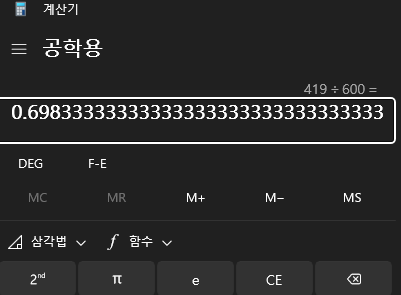